Первое уравнение


In [215]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [264]:
#Инициализируем параметры 
t_0 = 0
t_1 = 1
x_0 = 0
x_1 = 1
N_t = 10000
N_x = 1000
tau = (t_1 - t_0)/(N_t-1)
h = (x_1 - x_0)/(N_x-1)
X = np.linspace(x_0, x_1, N_x)
T = np.linspace(t_0, t_1, N_t)
R1 = np.zeros((N_t,N_x))
R2 = np.zeros((N_t,N_x))
R3 = np.zeros((N_t,N_x))


In [265]:
def r_x0(t):
    return 1/8*(4*np.cos(np.pi*t)-2*np.cos(np.pi*t)-2*np.cos(np.pi*t)+16*np.sin(np.pi*t)+4*np.sin(np.pi*t)-4*np.sin(np.pi*t)+8)

def r_x1(t):
    
    return(-r_x0(t))

def v_x1(t):
    return 1/8*( 32*np.cos(np.pi*t)+8*np.cos(np.pi*t)-24*np.cos(np.pi*t)+8*np.sin(np.pi*t)-16*np.sin(np.pi*t)-48*np.sin(np.pi*t))

In [266]:
u = np.zeros((N_t,N_x))
v = np.zeros((N_t,N_x))
r = np.zeros((N_t,N_x))

In [267]:
for i in range(N_x):
    R1[0][i] = np.sin(np.pi*i*h)-2*np.cos(np.pi*i*h) + 1+np.sin(np.pi*i*h)
    R2[0][i] = -3*np.sin(np.pi*i*h) + 4*np.cos(np.pi*i*h) + 1+np.sin(np.pi*i*h)
    R3[0][i] = 5*np.sin(np.pi*i*h) - 12*np.cos(np.pi*i*h) + 1+np.sin(np.pi*i*h)


In [268]:
X = np.linspace(x_0, x_1, N_x)

In [269]:
i = 0
while i<N_t//2:
    R2[i][N_x-1] = -3*np.sin(np.pi*(x_1 - 2*i*tau)) + 4*np.cos(np.pi*(x_1 - 2*i*tau)) + 1+np.sin(np.pi*(x_1 - 2*i*tau))
    i+=1
    
i = 0
while i< N_t//5:
    R1[i][0] = np.sin(np.pi*5*i*tau) - 2*np.cos(np.pi*5*i*tau) + 1+np.sin(np.pi*5*i*tau)
    i+=1
    
i = 0
while i < N_t:
    R3[i][0] =  5*np.sin(np.pi*i*tau) -12*np.cos(np.pi*i*tau) + 1+np.sin(np.pi*i*tau)
    i+=1

for i in range(N_t//2):
    R1[i][N_x-1] = -1/5*R2[i][N_x-1] +6/5*r_x1(i*tau)+1/10*v_x1(i*tau)
    R1[i+N_t//5][0] = R1[i][N_x-1]
for i in range(N_t//2):
    R2[i][0] = -8*R1[i][0]+R3[i][0]+8*r_x0(i*tau)
    R2[i+N_t//2][N_x-1] = R2[i][0]
for i in range((N_t+1)//2,N_t-1):
    R1[i][N_x-1] = -1/5*R2[i][N_x-1] +6/5*r_x1(i*tau)+1/10*v_x1(i*tau)
for i in range((N_t+1)//2, 4*N_t//5):
    R1[i+N_t//5][0] = R1[i][N_x-1]
for i in range((N_t-1)//2,N_t):
    R2[i][0] = -8*R1[i][0]+R3[i][0]+8*r_x0(i*tau)
for i in range(N_t):
    R3[i][N_x-1] = -3/5*R2[i][N_x-1]+4/5*v_x1(i*tau)+8/5*r_x1(i*tau)

In [270]:
for i in range(N_t//2):
    R1[i][N_x-1] = -1/3*R2[i][N_x-1] +7/3*np.cos(np.pi*tau*i)-2/3*np.cos(np.pi*tau*i)
    R1[i+N_t//5][0] = R1[i][N_x-1]
for i in range(N_t//2):
    R2[i][0] = -8*R1[i][0]+R3[i][0]+3*np.cos(np.pi*i*tau)
    R2[i+N_t//2][N_x-1] = R2[i][0]
for i in range(N_t//2,N_t-1):
    R1[i][N_x-1] = -1/3*R2[i][N_x-1] +7/3*np.cos(np.pi*tau*i)-2/3*np.cos(np.pi*tau*i)
for i in range(N_t//2, 4*N_t//5):
    R1[i+N_t//5][0] = R1[i][N_x-1]
for i in range(N_t//2,N_t):
    R2[i][0] = -8*R1[i][0]+R3[i][0]+3*np.cos(np.pi*i*tau)
for i in range(N_t):
    R3[i][N_x-1] = -5/3*R2[i][N_x-1]+8/3*np.cos(np.pi*tau*i)-16/3*np.cos(np.pi*tau*i)

In [271]:
sig = tau/h

for i in range(N_t-1):
    for j in range(N_x-1):
        R1[i+1][j+1] = 1/(1/2/tau-5/2/h)*((R1[i][j+1]+R1[i][j]-R1[i+1][j])/2/tau-5*(R1[i+1][j]+R1[i][j]-R1[i][j+1])/2/h)
        R2[i+1][j+1] = 1/(1/2/tau+2/2/h)*((R2[i][j+1]+R2[i][j]-R2[i+1][j])/2/tau+2*(R2[i+1][j]+R2[i][j]-R2[i][j+1])/2/h)
        R3[i+1][j+1] = 1/(1/2/tau-1/2/h)*((R3[i][j+1]+R3[i][j]-R3[i+1][j])/2/tau-(R3[i+1][j]+R3[i][j]-R3[i][j+1])/2/h)
        


for i in range(N_t-1):
    for j in range(N_x-1):
        
        R2[i+1][j+1] = R2[i][j]+(2*sig-1)/(2*sig+1)*(R2[i+1][j]-R2[i][j+1])
        


for i in range(N_t-1):
    for j in range(N_x-1, 0, -1):
        R1[i+1][j-1] = R1[i][j]+(5*sig-1)/(5*sig+1)*(R1[i+1][j]-R1[i][j-1])
        R3[i+1][j-1] = R3[i][j]+(sig-1)/(sig+1)*(R3[i+1][j]-R3[i][j-1])

In [272]:
for i in range(N_t-1):
    for j in range(1, N_x-1):
        R1[i+1][j] = 1/2*(R1[i][j+1]+R1[i][j-1])+5*tau/2/h*(R1[i][j+1] - R1[i][j-1])
        R2[i+1][j] = 1/2*(R2[i][j+1]+R2[i][j-1])-2*tau/2/h*(R2[i][j+1] - R2[i][j-1])
        R3[i+1][j] = 1/2*(R3[i][j+1]+R3[i][j-1])+1*tau/2/h*(R3[i][j+1] - R3[i][j-1])
        

In [273]:
for i in range(N_t):
    for j in range(N_x):
        u[i][j]= 1/4*(-3*R2[i][j]+6*R3[i][j])
        v[i][j]= 1/4*(2*R1[i][j]-R2[i][j]-R3[i][j])
        r[i][j]= 1/8*(8*R1[i][j]+1*R2[i][j]-1*R3[i][j])


In [274]:
T = np.linspace(0,1,N_t)

X = np.linspace(0,1,N_x)

X, T = np.meshgrid(X, T)

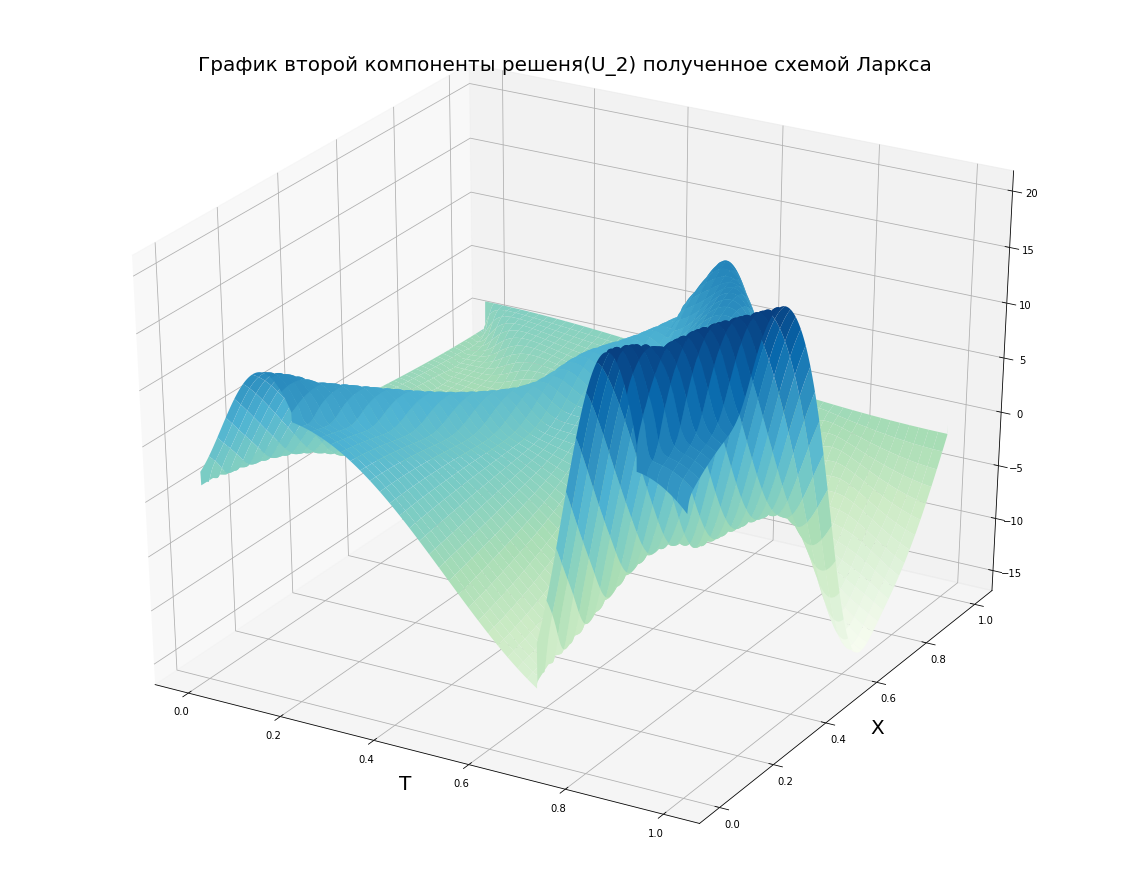

In [275]:
fig = plt.figure(figsize = (20, 16))
ax = fig.gca(projection='3d')

# Make data.

surf = ax.plot_surface(T,X,v,cmap=cm.GnBu)

plt.xlabel('T', fontsize=20)
plt.ylabel('X' , fontsize=20)
plt.title('График второй компоненты решеня(U_2) полученное схемой Ларкса', fontsize=20)

plt.savefig('FirstV.png')
plt.show()


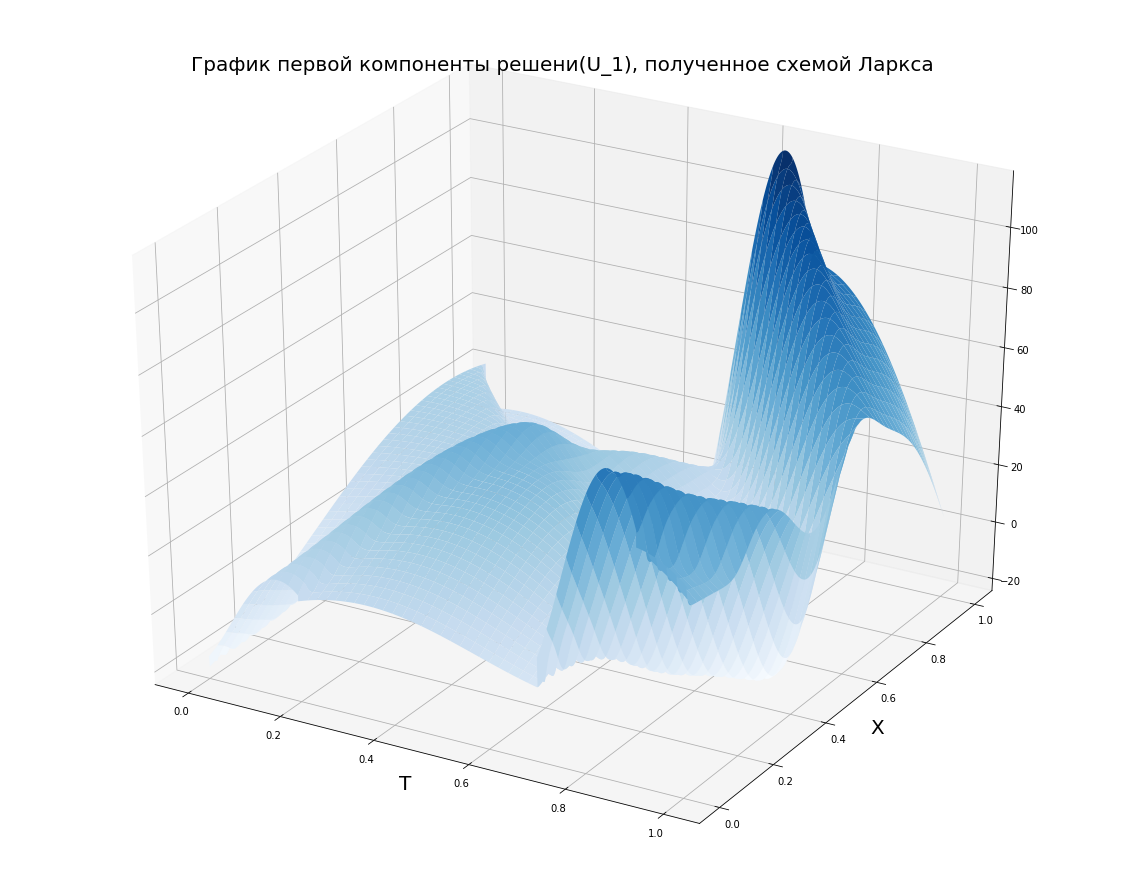

In [276]:
fig = plt.figure(figsize = (20, 16))
ax = fig.gca(projection='3d')

# Make data.

surf = ax.plot_surface(T, X, u, cmap=cm.Blues, label = 'число Куранта<1')
plt.xlabel('T', fontsize=20)
plt.ylabel('X' , fontsize=20)
plt.title('График первой компоненты решени(U_1), полученное схемой Ларкса ', fontsize=20)

plt.savefig('FirstU.png')
plt.show()


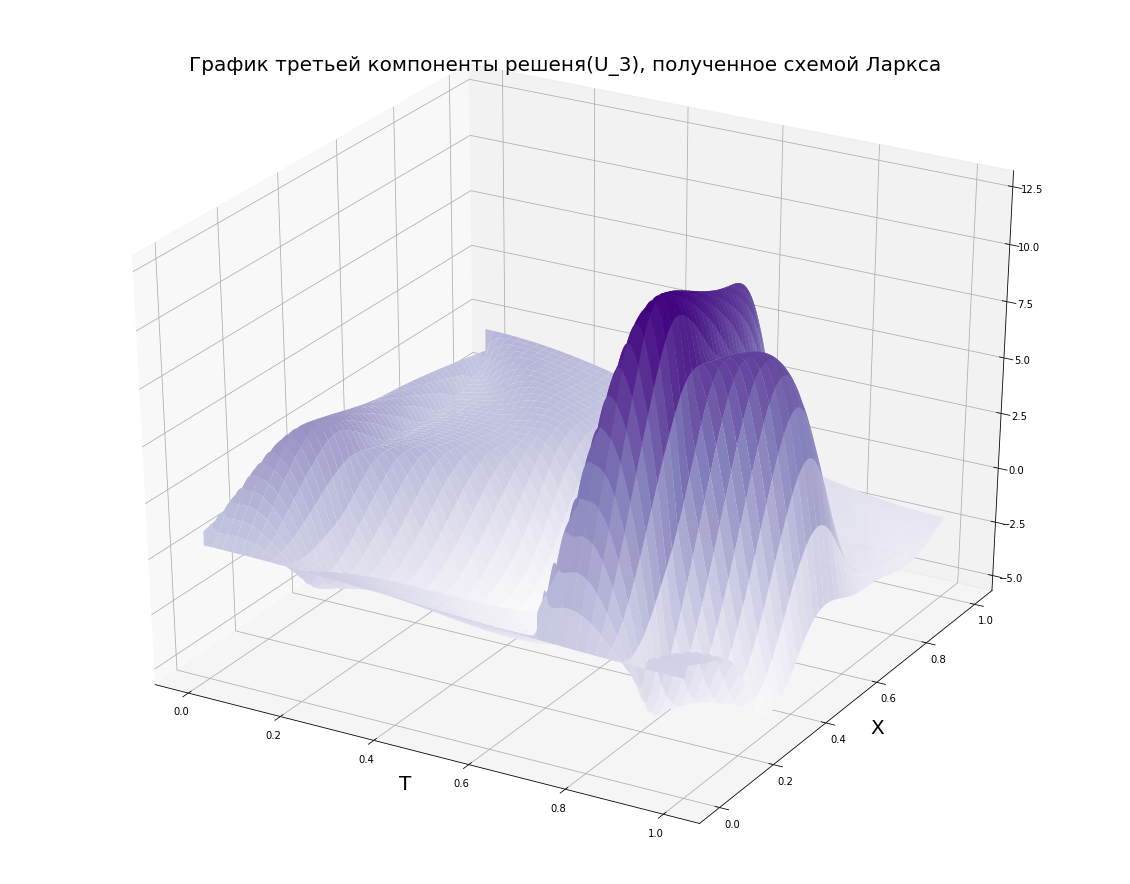

In [277]:
fig = plt.figure(figsize = (20, 16))
ax = fig.gca(projection='3d')

# Make data.
surf = ax.plot_surface(T,X,r,cmap=cm.Purples)

plt.xlabel('T', fontsize=20)
plt.ylabel('X' , fontsize=20)
plt.title('График третьей компоненты решеня(U_3), полученное схемой Ларкса', fontsize=20)

plt.savefig('FirstR.png')
plt.show()


In [54]:
U = np.zeros((N_t, N_x))
V = np.zeros((N_t, N_x))
R = np.zeros((N_t, N_x))

In [44]:
for i in range(N_t):
    for j in range(N_x):
        si = (-32*np.cos(5*np.pi*i*tau)-16*np.cos(2*np.pi*i*tau)+48*np.cos(np.pi*i*tau)+8*np.sin(5*np.pi*i*tau)-8*np.sin(2*np.pi*i*tau)-24*np.sin(np.pi*i*tau))
        co = (-8*np.cos(5*np.pi*i*tau)-8*np.cos(2*np.pi*i*tau)+24*np.cos(np.pi*i*tau)-32*np.sin(5*np.pi*i*tau)+16*np.sin(2*np.pi*i*tau)+48*np.sin(np.pi*i*tau))
        V[i][j] = 1/8*(np.sin(np.pi*j*h)*si+np.cos(np.pi*j*h)*co)

NameError: name 'V' is not defined

In [37]:
for i in range(N_t):
    for j in range(N_x):
        si = (16*np.cos(5*np.pi*i*tau)+12*np.cos(2*np.pi*i*tau)-20*np.cos(np.pi*i*tau)-4*np.sin(5*np.pi*i*tau)+6*np.sin(2*np.pi*i*tau)+10*np.sin(np.pi*i*tau))
        co = (4*np.cos(5*np.pi*i*tau)+6*np.cos(2*np.pi*i*tau)-10*np.cos(np.pi*i*tau)+16*np.sin(5*np.pi*i*tau)-6*np.sin(2*np.pi*i*tau)+20*np.sin(np.pi*i*tau))
        U[i][j] = 1/8*(np.sin(np.pi*j*h)*si+np.cos(np.pi*j*h)*co)

In [38]:
for i in range(N_t):
    for j in range(N_x):
        si = (-16*np.cos(5*np.pi*i*tau)-4*np.cos(2*np.pi*i*tau)-4*np.cos(np.pi*i*tau)-4*np.sin(5*np.pi*i*tau)+2*np.sin(2*np.pi*i*tau)+2*np.sin(np.pi*i*tau))
        co = (4*np.cos(5*np.pi*i*tau)-2*np.cos(2*np.pi*i*tau)-2*np.cos(np.pi*i*tau)+16*np.sin(5*np.pi*i*tau)+4*np.sin(2*np.pi*i*tau)-4*np.sin(np.pi*i*tau))
        R[i][j] = 1/8*(np.sin(np.pi*j*h)*si+np.cos(np.pi*j*h)*co+8)

In [45]:
Rs1 = np.zeros((N_t, N_x))
Rs2 = np.zeros((N_t, N_x))
Rs3 = np.zeros((N_t, N_x))

In [46]:
for i in range(N_t):
    for j in range(N_x):
        if i*tau<j*h/2:
            i_s =int(i+(N_x - j)*h/2/h)
            Rs2[i][j] = R2[i_s][N_x-1]
        else:
            i_s = int(i-j*h/2/tau)
            Rs2[i][j] = R2[i_s][0]

In [47]:
for i in range(N_t):
    for j in range(N_x):
        if i*tau<(N_t-j)*h/5:
            j_s =int(j+(N_x - j)*tau*5/h)
            Rs1[i][j] = R1[0][j_s]
        else:
            i_s = int(i-(N_x-j)*h/5/tau)
            Rs1[i][j] = R1[i_s][N_t-1]

In [48]:
for i in range(N_t):
    for j in range(N_x):
        if i*tau<(N_t-j)*h:
            j_s =int(j+(N_x - j)*tau/h)
            Rs3[i][j] = R3[0][j_s]
        else:
            i_s = int(i-(N_x-j)*h/tau)
            Rs3[i][j] = R3[i_s][N_t-1]

In [49]:
for i in range(N_t):
    for j in range(N_x):
        Us[i][j]= 1/8*(8*Rs1[i][j]-3*Rs2[i][j]-5*Rs3[i][j])
        Vs[i][j]= 1/8*(-16*Rs1[i][j]+4*Rs2[i][j]+12*Rs3[i][j])
        Rs[i][j]= 1/8*(8*Rs1[i][j]+1*Rs2[i][j]-1*Rs3[i][j])


NameError: name 'Us' is not defined

In [41]:
err1 = abs(u-Us).max()
err2 = abs(v-Vs).max()
err3 = abs(r-Rs).max()


NameError: name 'Us' is not defined

In [97]:
Us1 = np.zeros((N_t, N_x))
Us2 = np.zeros((N_t, N_x))
Us3 = np.zeros((N_t, N_x))

In [167]:
erx1 = []
cur1 = []
erx2 = []
cur2 =[]
erx3 = []
cur3 = []

In [154]:
for l in range(1):
    for k in range(14):
        N_t = 2**(9+k)
        N_x = 4**(4)
        tau = (t_1 - t_0)/N_t
        h = (x_1 - x_0)/N_x
        print(N_x,N_t)
        R1 = np.zeros((N_t,N_x))
        R2 = np.zeros((N_t,N_x))
        R3 = np.zeros((N_t,N_x))
        u = np.zeros((N_t,N_x)) 
        v = np.zeros((N_t,N_x))
        r = np.zeros((N_t,N_x))
        
        for i in range(N_x):
            R1[0][i] = np.sin(np.pi*i*h)-2*np.cos(np.pi*i*h) + 1+np.sin(np.pi*i*h)
            R2[0][i] = -3*np.sin(np.pi*i*h) + 4*np.cos(np.pi*i*h) + 1+np.sin(np.pi*i*h)
            R3[0][i] = 5*np.sin(np.pi*i*h) - 12*np.cos(np.pi*i*h) + 1+np.sin(np.pi*i*h)
        i = 0
        while i<N_t//2:
            R2[i][N_x-1] = -3*np.sin(np.pi*(x_1 - 2*i*tau)) + 4*np.cos(np.pi*(x_1 - 2*i*tau)) + 1+np.sin(np.pi*(x_1 - 2*i*tau))
            
            i+=1
        i = 0
        while i< N_t//5:
            R1[i][0] = np.sin(np.pi*5*i*tau)-2*np.cos(np.pi*5*i*tau) + 1+np.sin(np.pi*5*i*tau)
            i+=1
        i = 0
        
        while i < N_t:
            R3[i][0] =  5*np.sin(np.pi*i*tau)-12*np.cos(np.pi*i*tau) + 1+np.sin(np.pi*i*tau)
            i+=1
        for i in range(N_t//2):
            R1[i][N_x-1] = -1/3*R2[i][N_x-1] +7/3*np.cos(np.pi*tau*i)-2/3*np.cos(np.pi*tau*i)
            R1[i+N_t//5][0] = R1[i][N_x-1]
        for i in range(N_t//2):
            R2[i][0] = -8*R1[i][0]+R3[i][0]+3*np.cos(np.pi*i*tau)
            R2[i+N_t//2][N_x-1] = R2[i][0]
        for i in range(N_t//2,N_t-1):
            R1[i][N_x-1] = -1/3*R2[i][N_x-1] +7/3*np.cos(np.pi*tau*i)-2/3*np.cos(np.pi*tau*i)            
        for i in range(N_t//2, 4*N_t//5):
            R1[i+N_t//5][0] = R1[i][N_x-1]
        for i in range(N_t//2,N_t):
            
            R2[i][0] = -8*R1[i][0]+R3[i][0]+3*np.cos(np.pi*i*tau)
        for i in range(N_t):
            R3[i][N_x-1] = -5/3*R2[i][N_x-1]-16/3*np.cos(np.pi*tau*i)+8/3*np.cos(np.pi*tau*i)
        for i in range(N_t-1):
            for j in range(N_x-1):
                R2[i+1][j+1] = R2[i][j]+(2*sig-1)/(2*sig+1)*(R2[i+1][j]-R2[i][j+1])
        for i in range(N_t-1):
            for j in range(N_x-1, 0, -1):
                R1[i+1][j-1] = R1[i][j]+(5*sig-1)/(5*sig+1)*(R1[i+1][j]-R1[i][j-1])
                R3[i+1][j-1] = R3[i][j]+(sig-1)/(sig+1)*(R3[i+1][j]-R3[i][j-1])
        Rs1 = np.zeros((N_t, N_x))
        Rs2 = np.zeros((N_t, N_x))
        Rs3 = np.zeros((N_t, N_x))
        Us1 = np.zeros((N_t, N_x))
        Us2 = np.zeros((N_t, N_x))
        Us3 = np.zeros((N_t, N_x))
        for i in range(N_t):
            for j in range(N_x):
                if i*tau<j*h/2:
                    i_s =int(i+(N_x - j)*h/2/h)
                    Rs2[i][j] = R2[i_s][N_x-1]
                else:
                    i_s = int(i-j*h/2/tau)
                    Rs2[i][j] = R2[i_s][0]
        for i in range(N_t):
            for j in range(N_x):
                if i*tau<(N_x-j-1)*h/5:
                    j_s =int(j+i*tau*5/h)
                    Rs1[i][j] = R1[0][j_s]
                else:
                    i_s = int(i-(N_x-j-1)/5*tau/h)
                    Rs1[i][j] = R1[i_s][N_x-1]
        for i in range(N_t):
            for j in range(N_x):
                if i*tau<(N_x-j-1)*h:
                    j_s =int(j+(N_x - j-1)*tau/h)
                    Rs3[i][j] = R3[0][j_s]
                else:
                    i_s = int(i-(N_x-j-1)/h*tau)
                    Rs3[i][j] = R3[i_s][N_x-1]
        #print(Us.shape,R1.shape )
        for i in range(N_t-1):
            for j in range(N_x-1):
                Us1[i][j]= 3/4*Rs2[i][j]+3/2*Rs3[i][j]
                Us2[i][j]= 1/4*(2*Rs1[i][j]-Rs2[i][j]-Rs3[i][j])
                Us3[i][j]= 1/8*(8*Rs1[i][j]+1*Rs2[i][j]-1*Rs3[i][j])

        err1 = abs(u-Us1).max()
        err2 = abs(v-Us2).max()
        err3 = abs(r-Us3).max()
        curr1 = 5*tau/h
        curr2 = 2*tau/h
        curr3 = tau/h
        erx1.append(err1)
        erx2.append(err2)
        erx3.append(err3)
        cur1.append(curr1)
        cur2.append(curr2)
        cur3.append(curr3)


256 512
256 1024
256 2048
256 4096
256 8192
256 16384
256 32768


KeyboardInterrupt: 

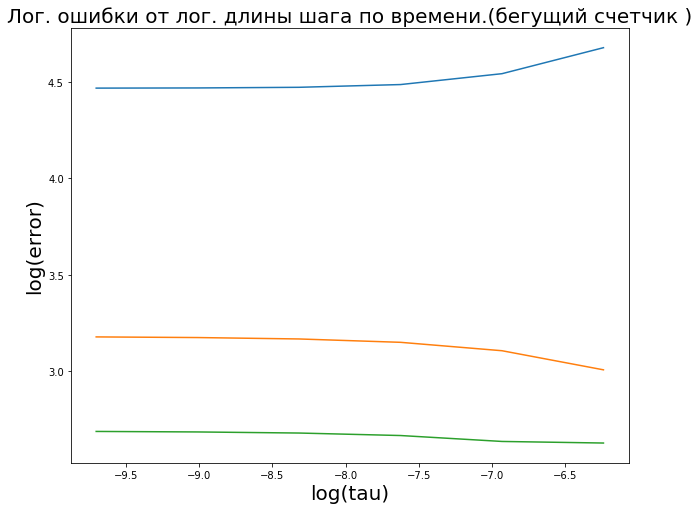

In [158]:
ax = plt.figure(figsize = (10,8))
plt.xlabel('log(tau)', fontsize=20)
plt.ylabel('log(error)' , fontsize=20)
plt.title('Лог. ошибки от лог. длины шага по времени.(бегущий счетчик )', fontsize=20)

plt.plot(np.log(tau_st), np.log(erx1))
plt.plot(np.log(tau_st), np.log(erx2))
plt.plot(np.log(tau_st), np.log(erx3))
plt.savefig('errs2t.png')
plt.show()



In [126]:
erx3

[14.699413453150449,
 14.699413453150449,
 14.699413453150449,
 14.699413453150449,
 14.670791612826953,
 14.626665999574323,
 14.537544255353971,
 14.342995153811819,
 13.89932143985264]

In [157]:
tau_st = []
for i in range(6):
    tau_st.append(1/2**(9+i))

In [128]:
from sklearn.linear_model import LinearRegression

In [165]:
model = LinearRegression()
tau_st1 = np.array(np.log(tau_st)).reshape((-1,1))
ert31 = np.array(np.log(erx1))
model.fit(tau_st1, ert31)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [166]:
model.coef_

array([0.05298806])

In [1556]:
tau_st

[0.015625,
 0.0078125,
 0.00390625,
 0.001953125,
 0.0009765625,
 0.00048828125,
 0.000244140625,
 0.0001220703125]

In [1631]:
tau_st = []
for i in range(11):
    tau_st.append(1/2**(3+i))

In [182]:
for l in range(1):
    for k in range(14):
        N_t = 2**(8+k)
        N_x = 2**(7)
        tau = (t_1 - t_0)/N_t
        h = (x_1 - x_0)/N_x
        print(N_x,N_t)
        R1 = np.zeros((N_t,N_x))
        R2 = np.zeros((N_t,N_x))
        R3 = np.zeros((N_t,N_x))
        u = np.zeros((N_t,N_x)) 
        v = np.zeros((N_t,N_x))
        r = np.zeros((N_t,N_x))
        
        for i in range(N_x):
            R1[0][i] = np.sin(np.pi*i*h)-2*np.cos(np.pi*i*h) + 1+np.sin(np.pi*i*h)
            R2[0][i] = -3*np.sin(np.pi*i*h) + 4*np.cos(np.pi*i*h) + 1+np.sin(np.pi*i*h)
            R3[0][i] = 5*np.sin(np.pi*i*h) - 12*np.cos(np.pi*i*h) + 1+np.sin(np.pi*i*h)
        i = 0
        while i<N_t//2:
            R2[i][N_x-1] = -3*np.sin(np.pi*(x_1 - 2*i*tau)) + 4*np.cos(np.pi*(x_1 - 2*i*tau)) + 1+np.sin(np.pi*(x_1 - 2*i*tau))
            i+=1
        i = 0
        while i< N_t//5:
            R1[i][0] = np.sin(np.pi*5*i*tau) - 2*np.cos(np.pi*5*i*tau) + 1+np.sin(np.pi*5*i*tau)
            i+=1
        i = 0
        while i < N_t:
            R3[i][0] =  5*np.sin(np.pi*i*tau) - 12*np.cos(np.pi*i*tau) + 1+np.sin(np.pi*i*tau)
            i+=1
        for i in range(N_t//2):
            R1[i][N_x-1] = -1/3*R2[i][N_x-1] -2/3*np.cos(np.pi*tau*i)+7/3*np.cos(np.pi*tau*i)
            R1[i+N_t//5][0] = R1[i][N_x-1]
        for i in range(N_t//2):
            R2[i][0] = -8*R1[i][0]+R3[i][0]+3*np.cos(np.pi*i*tau)
            R2[i+N_t//2][N_x-1] = R2[i][0]
        for i in range(N_t//2,N_t-1):
            R1[i][N_x-1] = -1/3*R2[i][N_x-1] -2/3*np.cos(np.pi*tau*i)+7/3*np.cos(np.pi*tau*i)
        for i in range(N_t//2, 4*N_t//5):
            R1[i+N_t//5][0] = R1[i][N_x-1]
        for i in range(N_t//2,N_t):
            R2[i][0] = -8*R1[i][0]+R3[i][0]+3*np.cos(np.pi*i*tau)
        for i in range(N_t):
            R3[i][N_x-1] = -5/3*R2[i][N_x-1]+8/3*np.cos(np.pi*tau*i)-16/3*np.cos(np.pi*tau*i)
        for i in range(N_t-1):
            for j in range(1, N_x-1):
                R1[i+1][j] = 1/2*(R1[i][j+1]+R1[i][j-1])+5*tau/2/h*(R1[i][j+1] - R1[i][j-1])
                R2[i+1][j] = 1/2*(R2[i][j+1]+R2[i][j-1])-2*tau/2/h*(R2[i][j+1] - R2[i][j-1])
                R3[i+1][j] = 1/2*(R3[i][j+1]+R3[i][j-1])+1*tau/2/h*(R3[i][j+1] - R3[i][j-1])
        
        Rs1 = np.zeros((N_t, N_x))
        Rs2 = np.zeros((N_t, N_x))
        Rs3 = np.zeros((N_t, N_x))
        Us1 = np.zeros((N_t, N_x))
        Us2 = np.zeros((N_t, N_x))
        Us3 = np.zeros((N_t, N_x))
        for i in range(N_t):
            for j in range(N_x):
                if i*tau<j*h/2:
                    i_s =int(i+(N_x - j)*h/2/h)
                    Rs2[i][j] = R2[i_s][N_x-1]
                else:
                    i_s = int(i-j*h/2/tau)
                    Rs2[i][j] = R2[i_s][0]
        for i in range(N_t):
            for j in range(N_x):
                if i*tau<(N_x-j-1)*h/5:
                    j_s =int(j+i*tau*5/h)
                    Rs1[i][j] = R1[0][j_s]
                else:
                    i_s = int(i-(N_x-j-1)/5*tau/h)
                    Rs1[i][j] = R1[i_s][N_x-1]
        for i in range(N_t):
            for j in range(N_x):
                if i*tau<(N_x-j-1)*h:
                    j_s =int(j+(N_x - j-1)*tau/h)
                    Rs3[i][j] = R3[0][j_s]
                else:
                    i_s = int(i-(N_x-j-1)/h*tau)
                    Rs3[i][j] = R3[i_s][N_x-1]
        #print(Us.shape,R1.shape )
        for i in range(N_t-1):
            for j in range(N_x-1):
                Us1[i][j]= -3/4*Rs2[i][j]+3/2*Rs3[i][j]
                Us2[i][j]= 1/4*(2*Rs1[i][j]-Rs2[i][j]-Rs3[i][j])
                Us3[i][j]= 1/8*(8*Rs1[i][j]+Rs2[i][j]-1*Rs3[i][j])

        err1 = abs(u-Us1).max()
        err2 = abs(v-Us2).max()
        err3 = abs(r-Us3).max()
        curr1 = 5*tau/h
        curr2 = 2*tau/h
        curr3 = tau/h
        erx1.append(err1)
        erx2.append(err2)
        erx3.append(err3)
        cur1.append(curr1)
        cur2.append(curr2)
        cur3.append(curr3)


128 256
128 512
128 1024
128 2048
128 4096
128 8192
128 16384
128 32768
128 65536


KeyboardInterrupt: 

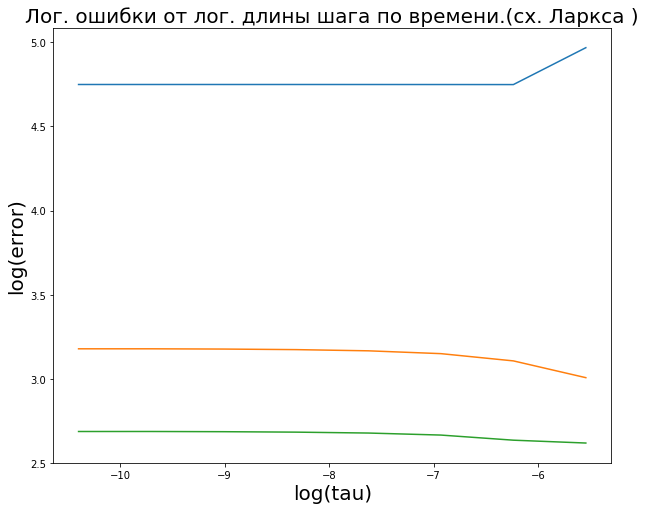

In [194]:
ax = plt.figure(figsize = (10,8))
plt.xlabel('log(tau)', fontsize=20)
plt.ylabel('log(error)' , fontsize=20)
plt.title('Лог. ошибки от лог. длины шага по времени.(сх. Ларкса )', fontsize=20)

plt.plot(np.log(tau_st), np.log(erx1[-8:]))
plt.plot(np.log(tau_st), np.log(erx2[-8:]))
plt.plot(np.log(tau_st), np.log(erx3[-8:]))
plt.savefig('errs1tt.png')
plt.show()


In [1661]:
len(erx1[25:])

6

In [184]:
tau_st = []
for i in range(8):
    tau_st.append(1/2**(8+i))

In [191]:
model = LinearRegression()
tau_st1 = np.array(np.log(tau_st)).reshape((-1,1))
ert31 = np.array(np.log(erx3[-8:]))
model.fit(tau_st1, ert31)
model.coef_

array([-0.01379083])